In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [45]:
df = pd.read_csv('DATA/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Do smokers have higher insurance charges than non-smokers?

In [47]:
df.groupby('smoker').size()

smoker
no     1064
yes     274
dtype: int64

In [48]:
smoke = df.loc[df['smoker']=='yes'].copy()
no_smoke = df.loc[df['smoker']=='no'].copy()

In [49]:
smoke_mean = df.groupby('smoker')['charges'].mean()

In [50]:
smoke_mean

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [51]:
smoke_charg = smoke['charges']
no_smoke_charg = no_smoke['charges']

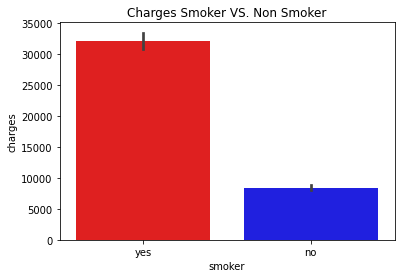

In [52]:
smoke_bar={'yes':'red', "no":'blue'}
sns.barplot(data=df, x='smoker',y='charges',palette=smoke_bar)
plt.title('Charges Smoker VS. Non Smoker',fontsize='large');

## 2 sample test

    .Check for outliers

In [53]:
zscores= stats.zscore(smoke_charg)
smoke_outli = abs(zscores)>3
np.sum(smoke_outli)

0

In [54]:
zscores= stats.zscore(no_smoke_charg)
no_smoke_outli = abs(zscores)>3
np.sum(no_smoke_outli)

24

Got to remove the outliers

In [55]:
no_smoke_charg = no_smoke_charg.loc[~no_smoke_outli]

In [56]:
result1 = stats.normaltest(smoke_charg)
print(result1)
result1.pvalue < 0.05

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)


True

In [57]:
result2 = stats.normaltest(no_smoke_charg)
print(result2)
result2.pvalue < .05

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)


True

Way above 15 I can disregard Normality

In [58]:
result3 = stats.levene(smoke_charg, no_smoke_charg)
result3

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

In [59]:
result4 = stats.ttest_ind(smoke_charg, no_smoke_charg, equal_var=False)
print(result4)
result4.pvalue < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

Alpha is (0.05) pvalue is < than alpha

- I can reject the Null hypothesis
- There is a big difference between the two groups

## Are men more likely to smoke than women? 

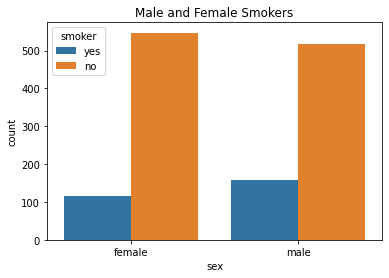

In [60]:
ax = sns.countplot(data=df, x='sex',hue='smoker')
ax.set_title("Male and Female Smokers");

In [63]:
sex_df = pd.crosstab(df['sex'], df['smoker'])
sex_df

smoker,no,yes
sex,,
female,547,115
male,517,159


In [67]:
s_result = stats.chi2_contingency(sex_df)
chi2, p, deg_free, expected_vals = s_result

In [68]:
print(p)
p<.05

0.006548143503580696


True

- Just like before we can reject the null there is a big difference between the two sexes

## Do different regions have different charges, on average?

In [69]:
reg_charg_mean = df.groupby('region')['charges'].mean()
reg_charg_mean

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

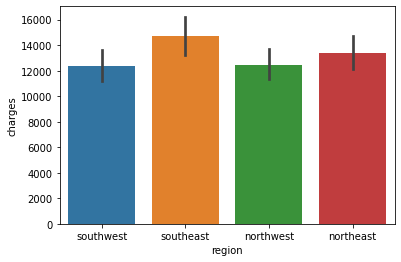

In [71]:
sns.barplot(data=df, x='region',y='charges');

In [74]:
groups = {}

for i in df['region'].unique():
   
    data = df.loc[df['region']==i,'charges'].copy()
    
   
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [75]:
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}

norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [76]:
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [77]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [78]:
result5 = stats.kruskal(*groups.values())
result5

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

- p_value > .05 I failed to reject or accept the null hypothesis